In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'taxa_abund_Ti_homo.csv'
data_df = pd.read_csv(file_path)

# DOL groupings and sample identifiers as provided

# Assigning 'DOL' groups directly as a new row in the DataFrame for clarity
dol_mapping = {
    "P11": ["050B", "052B", "059B", "064B", "065B", "074B", "076B", "086B", "095B", "103B", "229B", "233B", "234B", "237B", "238B", "239B"],
    "P14": ["141B", "142B", "145B", "148B", "149B", "155B", "157B", "163B", "165B", "166B", "168B", "249B", "250B", "252B", "253B", "254B", "256B"],
    "P28": ["109B", "112B", "113B", "114B", "121B", "122B", "126B", "130B", "133B", "138B"]
}


# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
data_df.set_index(data_df.columns[0], inplace=True)

data_df


,050B,052B,059B,064B,065B,074B,076B,086B,095B,103B,...,234B,237B,238B,239B,249B,250B,252B,253B,254B,256B
class,,,,,,,,,,,,,,,,,,,,,
Actinobacteria,0,0,0,0,0,11,0,2,1,10,...,10,46,51,13,4,4,4,0,6,0
Bacteroidetes,0,0,3,0,1,16,5,3,4,16,...,131,298,483,110,320,68,61,133,101,20
Epsilonbacteraeota,0,0,0,0,0,5,0,0,0,0,...,14,28,71,3,0,1,0,7,4,1
Euglenozoa,1,1,2,1,1,60,6,4,9,25,...,0,0,0,0,6,2,0,0,4,0
Firmicutes,1323,2240,3278,4171,4086,2298,4296,3440,2552,2335,...,2984,2723,2268,3665,3508,4149,4262,4146,4071,4104
Fusobacteria,0,0,0,0,0,8,0,1,0,0,...,0,11,24,3,10,2,0,0,9,5
Proteobacteria,3172,2255,1213,324,408,2098,189,1046,1930,2110,...,1343,1364,1554,686,640,269,169,201,281,366
Spirochaetes,0,0,0,0,0,0,0,0,0,0,...,14,26,45,16,8,1,0,9,20,0
DOL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


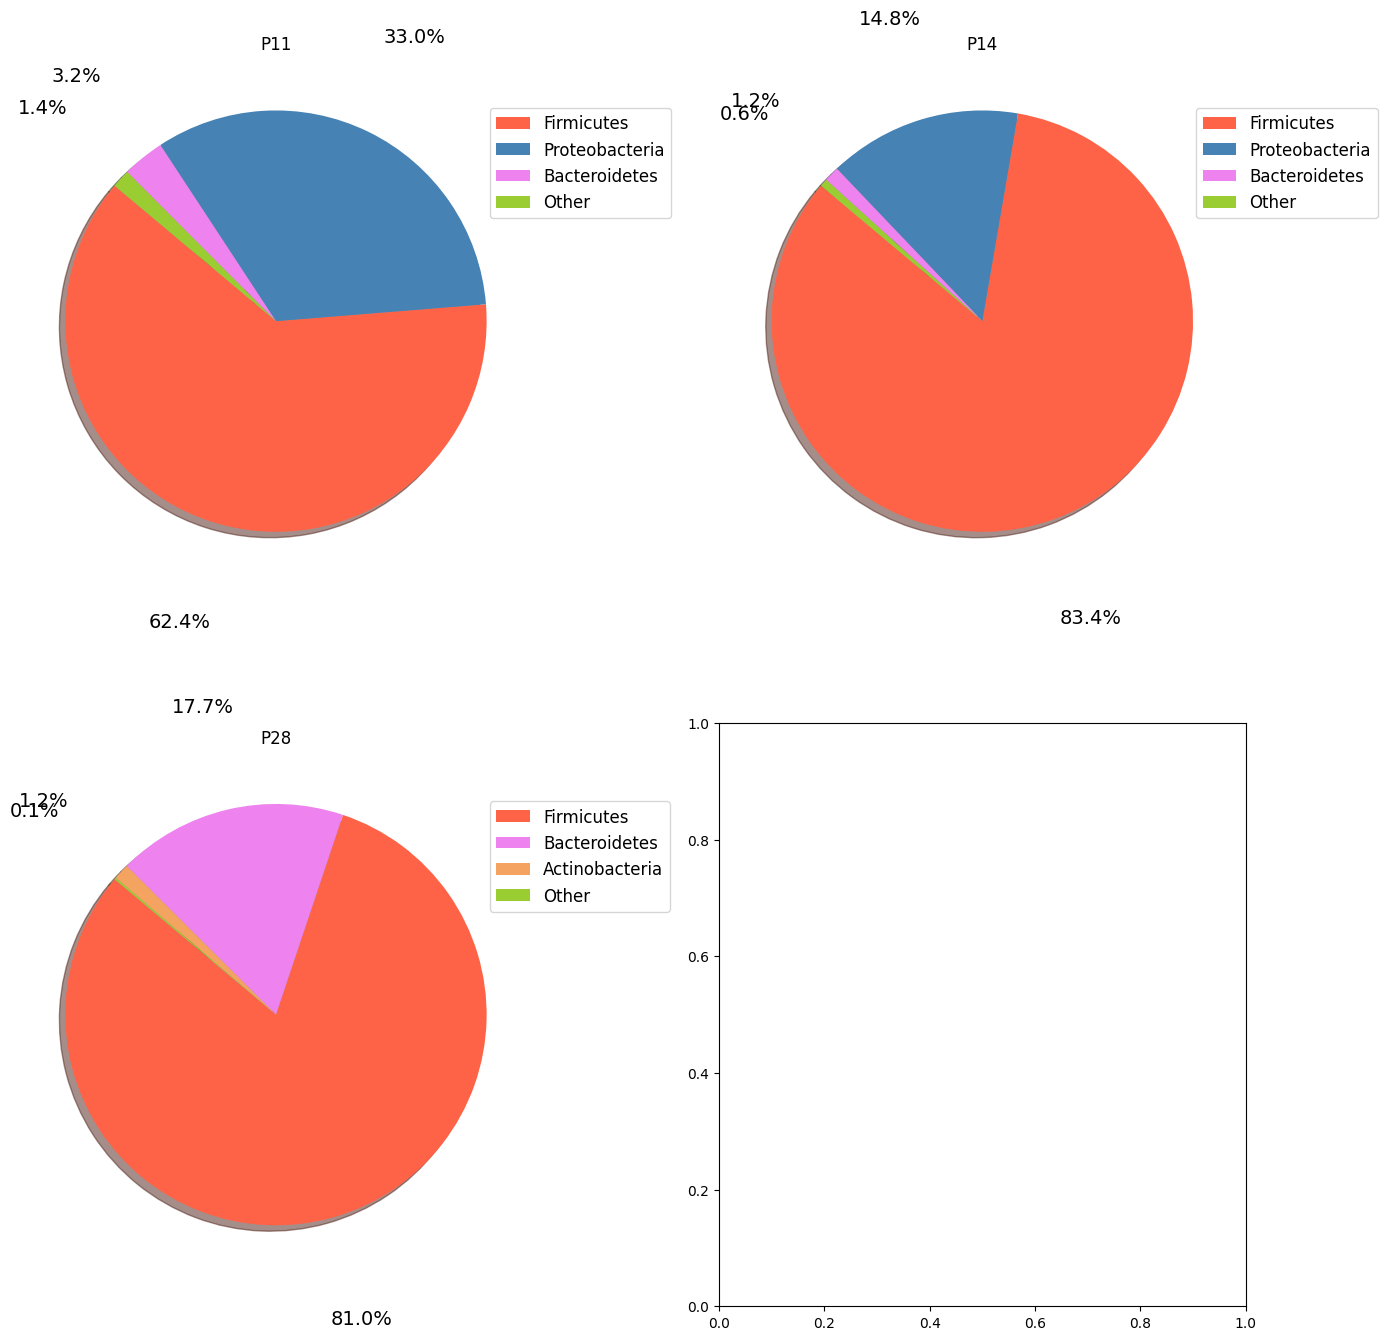

In [2]:
# Define color mapping
color_mapping = {
    'Firmicutes': '#FF6347',
    'Proteobacteria': '#4682B4',
    'Bacteroidetes': '#EE82EE',
    'Actinobacteria': '#F4A460',
    'Euglenozoa': '#8A2BE2',
    'Other': '#9ACD32'
}
# Calculate and plot the pie charts with the top 3 features and 'Other'
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
for i, (dol, cols) in enumerate(dol_mapping.items()):
    ax = axes[i//2, i%2]
    sums = data_df[cols].sum(axis=1).sort_values(ascending=False)
    top_three = sums.head(3)
    other = pd.Series(sums[3:].sum(), index=['Other'])
    final_sums = pd.concat([top_three, other])
    
    # Assign colors according to the taxa, with a default color for 'Other'
    colors = [color_mapping.get(tax, color_mapping['Other']) for tax in final_sums.index]

    # wedges, texts, autotexts = ax.pie(final_sums, labels=final_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    wedges, texts, autotexts = ax.pie(final_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors,pctdistance=1.5, labeldistance=2.2,shadow=True,textprops={'fontsize': 14, 'color': 'black'})
    ax.set_title(f'{dol}')
    # Add a legend outside the plot
    ax.legend(wedges, final_sums.index, title="", loc="center left", bbox_to_anchor=(0.89, 0.3, 0.5, 1),fontsize='large')

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'taxa_abund_Ti_het.csv'
data_df = pd.read_csv(file_path)

# Assigning 'DOL' groups directly as a new row in the DataFrame for clarity
dol_mapping = {
    "P11": ["051B", "058B", "060B", "066B", "067B", "080B", "082B", "084B", "087B", "096B", "102B", "104B", "214B", "216B", "230B", "231B", "232B", "236B", "240B", "251B"],
    "P14": ["143B", "144B", "147B", "150B", "152B", "153B", "154B", "159B", "160B", "164B", "169B", "255B", "257B", "262B", "263B"],
    "P28": ["108B", "110B", "116B", "117B", "118B", "123B", "125B", "127B", "128B", "131B", "132B", "136B", "139B"]
}

# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
data_df.set_index(data_df.columns[0], inplace=True)

data_df

,051B,058B,060B,066B,067B,080B,082B,084B,087B,096B,...,230B,231B,232B,236B,240B,251B,255B,257B,262B,263B
class,,,,,,,,,,,,,,,,,,,,,
Actinobacteria,18,1,4,6,0,3,11,9,12,0,...,144,28,298,58,196,4,34,2,8,6
Bacteroidetes,11,6,8,11,1,13,43,59,13,3,...,664,609,826,472,1111,149,166,13,39,26
Epsilonbacteraeota,0,0,0,0,0,0,0,0,0,3,...,65,74,103,61,212,0,0,0,6,0
Euglenozoa,25,22,2,4,3,70,56,72,17,1,...,0,0,5,0,0,0,3,0,0,0
Firmicutes,707,3535,6303,7554,7864,4707,4326,5514,7964,6260,...,5495,4738,4546,4889,4583,7961,7972,7368,8238,8288
Fusobacteria,0,0,0,0,0,0,0,0,0,0,...,34,80,76,7,34,12,12,0,0,0
Patescibacteria,0,0,0,0,0,0,0,0,0,0,...,7,0,15,15,12,0,3,0,0,0
Proteobacteria,7715,4912,2159,901,608,3683,4040,2822,470,2209,...,2067,2947,2607,2974,2328,350,286,1093,185,156
DOL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


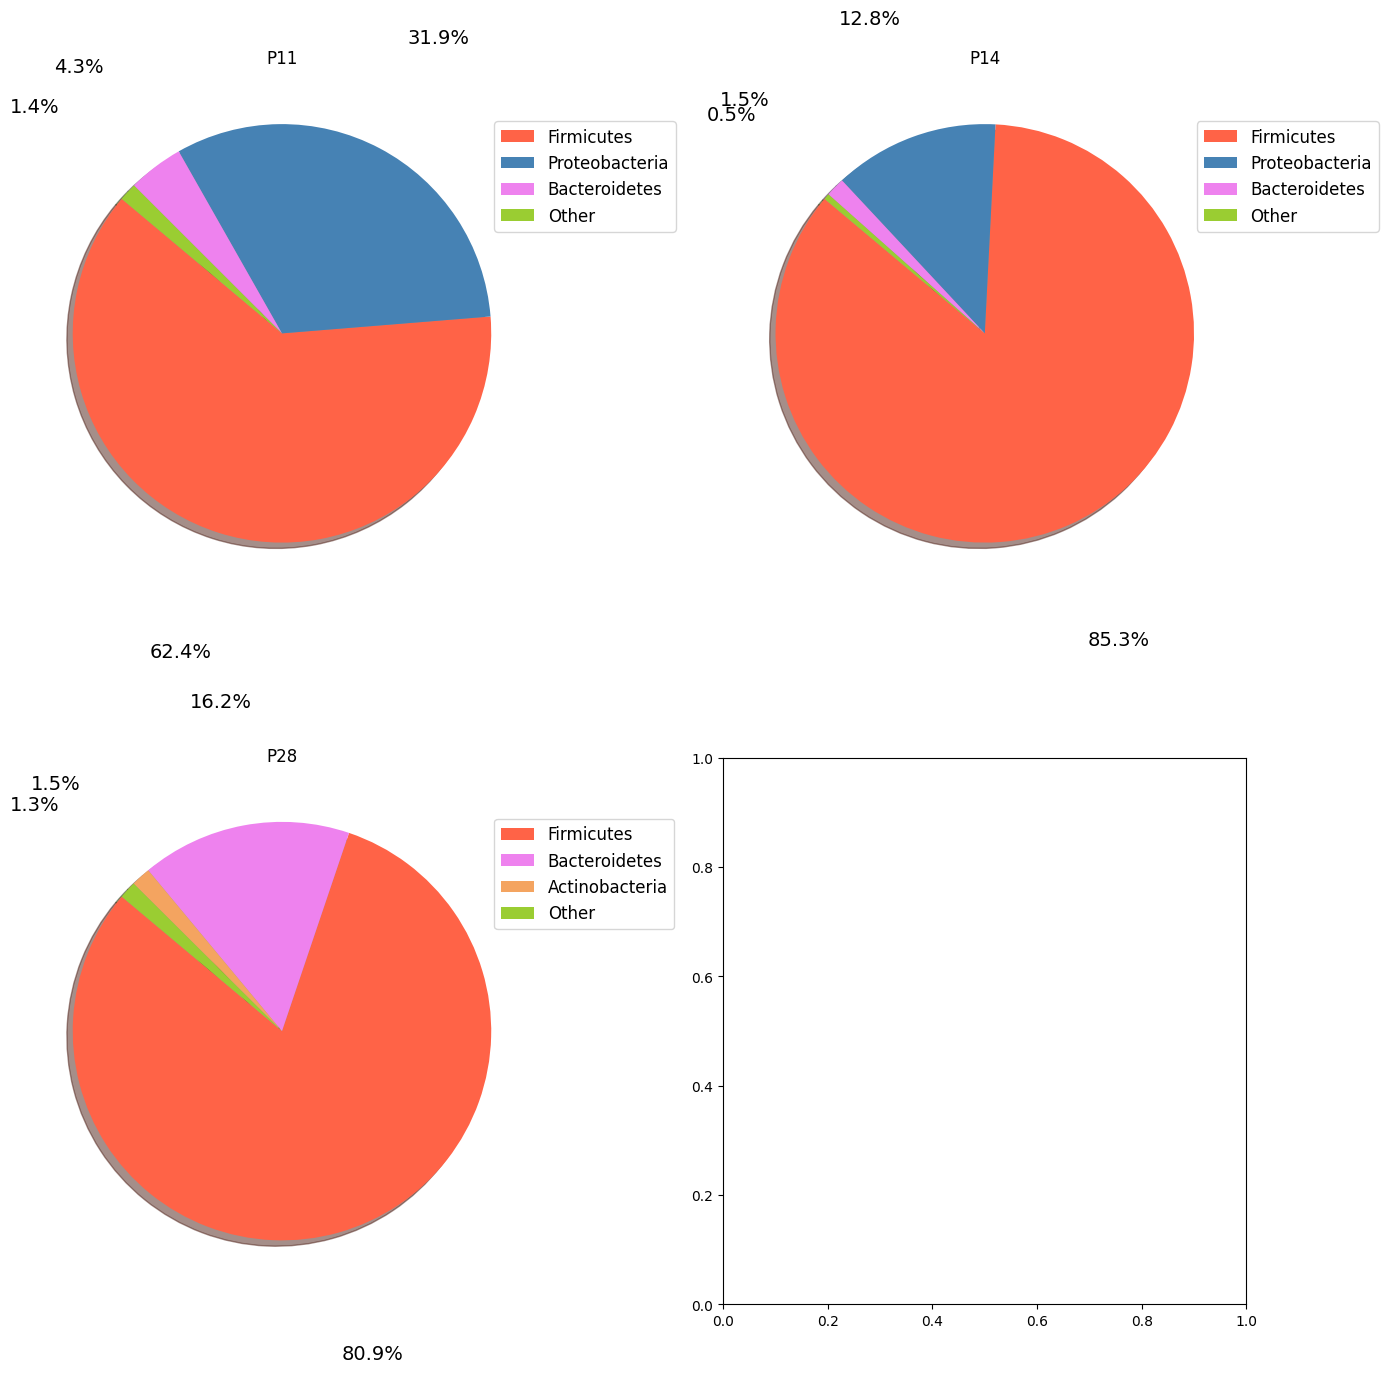

In [4]:
# Define color mapping
color_mapping = {
    'Firmicutes': '#FF6347',
    'Proteobacteria': '#4682B4',
    'Bacteroidetes': '#EE82EE',
    'Actinobacteria': '#F4A460',
    'Euglenozoa': '#8A2BE2',
    'Other': '#9ACD32'
}
# Calculate and plot the pie charts with the top 3 features and 'Other'
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
for i, (dol, cols) in enumerate(dol_mapping.items()):
    ax = axes[i//2, i%2]
    sums = data_df[cols].sum(axis=1).sort_values(ascending=False)
    top_three = sums.head(3)
    other = pd.Series(sums[3:].sum(), index=['Other'])
    final_sums = pd.concat([top_three, other])
    
    # Assign colors according to the taxa, with a default color for 'Other'
    colors = [color_mapping.get(tax, color_mapping['Other']) for tax in final_sums.index]

    # wedges, texts, autotexts = ax.pie(final_sums, labels=final_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    wedges, texts, autotexts = ax.pie(final_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors,pctdistance=1.6, labeldistance=2.2,shadow=True,textprops={'fontsize': 14, 'color': 'black'})
    ax.set_title(f'{dol}')
    # Add a legend outside the plot
    ax.legend(wedges, final_sums.index, title="", loc="center left", bbox_to_anchor=(0.89, 0.3, 0.5, 1),fontsize='large')

plt.tight_layout()
plt.show()

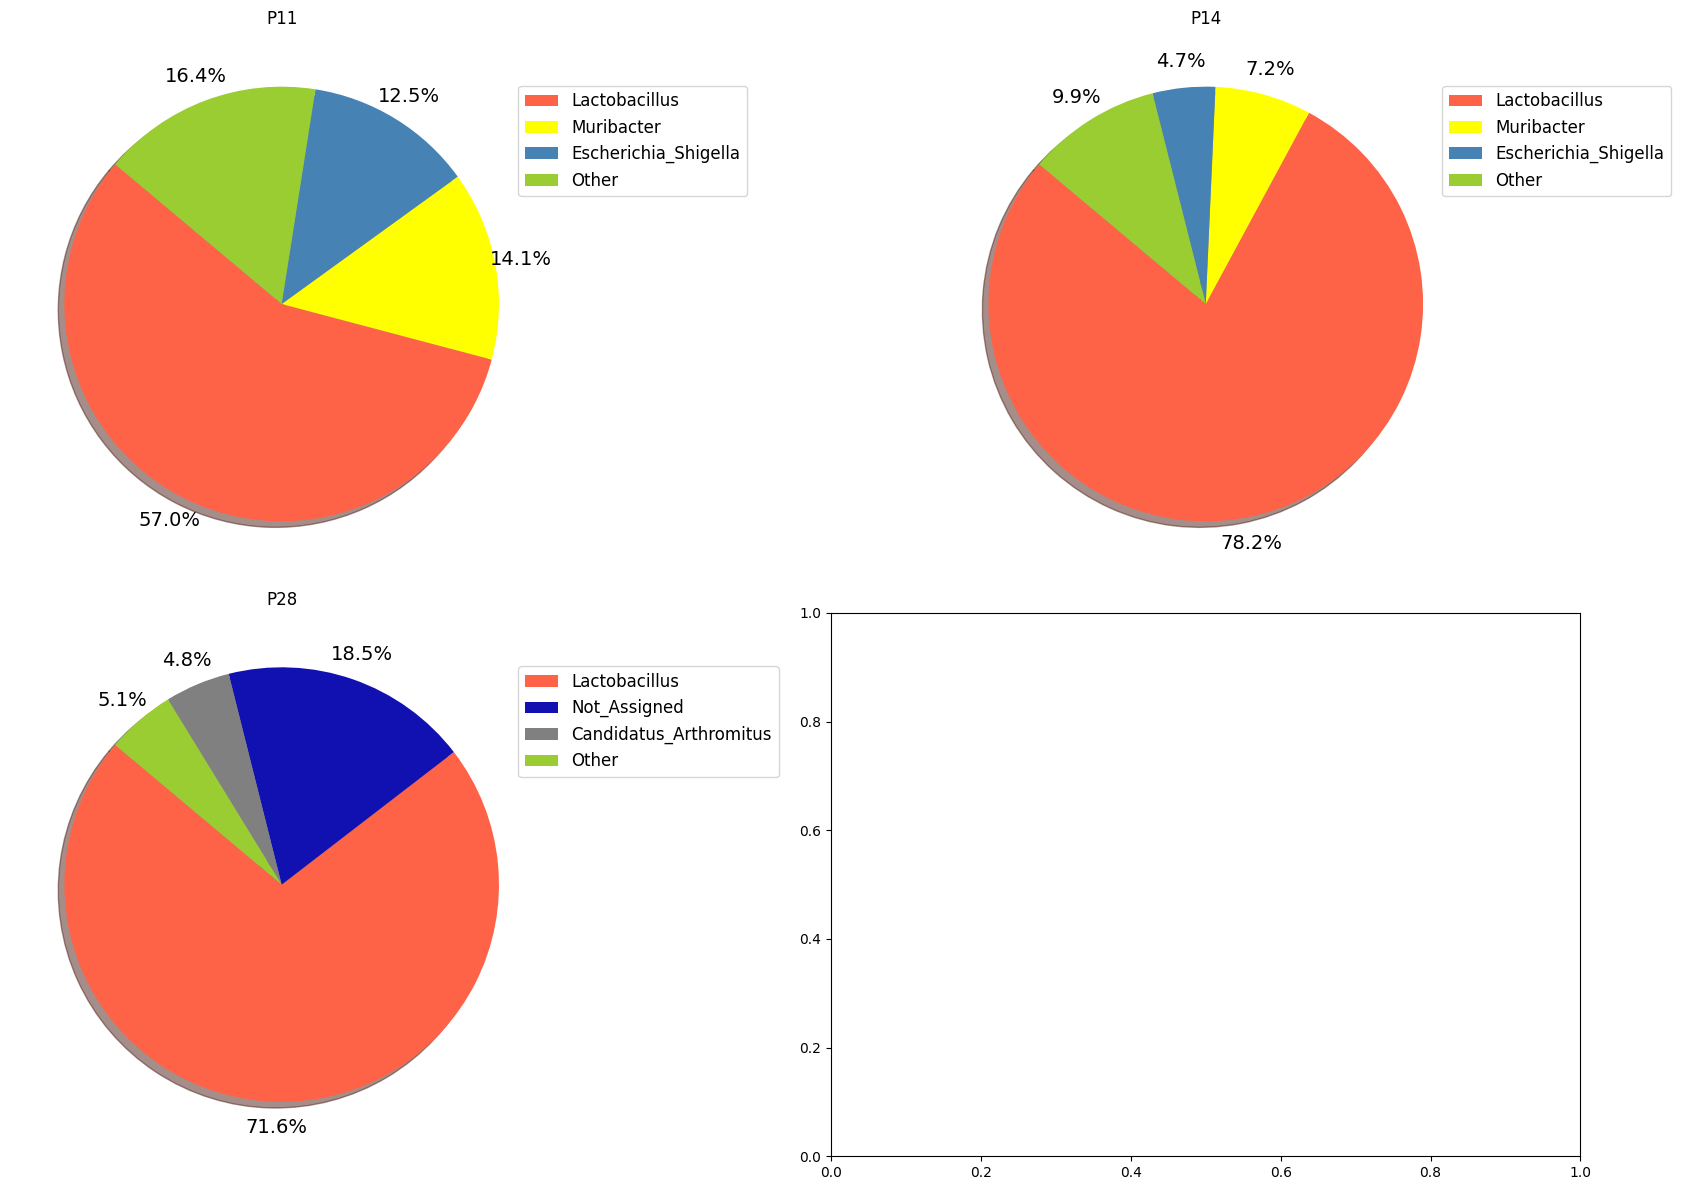

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'taxa_abund_ti_homo_genus.csv'
data_df = pd.read_csv(file_path)

# Assigning 'DOL' groups directly as a new row in the DataFrame for clarity
dol_mapping = {
    "P11": ["050B", "052B", "059B", "064B", "065B", "074B", "076B", "086B", "095B", "103B", "229B", "233B", "234B", "237B", "238B", "239B"],
    "P14": ["141B", "142B", "145B", "148B", "149B", "155B", "157B", "163B", "165B", "166B", "168B", "249B", "250B", "252B", "253B", "254B", "256B"],
    "P28": ["109B", "112B", "113B", "114B", "121B", "122B", "126B", "130B", "133B", "138B"]
}



# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
data_df.set_index(data_df.columns[0], inplace=True)

# Sum up the counts by DOL for each bacteria type
# dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
# data_df.set_index(data_df.columns[0], inplace=True)
# Define color mapping
color_mapping = {
    'Lactobacillus': '#FF6347',
    'Escherichia_Shigella': '#4682B4',
    'Not_Assigned': '#1111B1',
    'Bacteroides': '#EE82EE',
    'Streptococcus': '#F4A460',
    'Muribacter': '#FFFF00',
    "Candidatus_Arthromitus":"grey",
    'Lachnospiraceae_NK4A136_group': '#8A2BE2',
    'Other': '#9ACD32'
}
# # Define color mapping
# color_mapping = {
#     'Firmicutes': '#FF6347',
#     'Proteobacteria': '#4682B4',
#     'Bacteroidetes': '#EE82EE',
#     'Actinobacteria': '#F4A460',
#     'Euglenozoa': '#8A2BE2',
#     'Other': '#9ACD32'
# }
# Calculate and plot the pie charts with the top 3 features and 'Other'
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
for i, (dol, cols) in enumerate(dol_mapping.items()):
    ax = axes[i//2, i%2]
    sums = data_df[cols].sum(axis=1).sort_values(ascending=False)
    top_three = sums.head(3)
    other = pd.Series(sums[3:].sum(), index=['Other'])
    final_sums = pd.concat([top_three, other])
    
    # Assign colors according to the taxa, with a default color for 'Other'
    colors = [color_mapping.get(tax, color_mapping['Other']) for tax in final_sums.index]

    # wedges, texts, autotexts = ax.pie(final_sums, labels=final_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    wedges, texts, autotexts = ax.pie(final_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors,pctdistance=1.12, labeldistance=2.2,shadow=True,textprops={'fontsize': 14, 'color': 'black'})
    ax.set_title(f'{dol}')
    # Add a legend outside the plot
    ax.legend(wedges, final_sums.index, title="", loc="center left", bbox_to_anchor=(0.92, 0.3, 0.5, 1),fontsize='large')

plt.tight_layout()
plt.show()

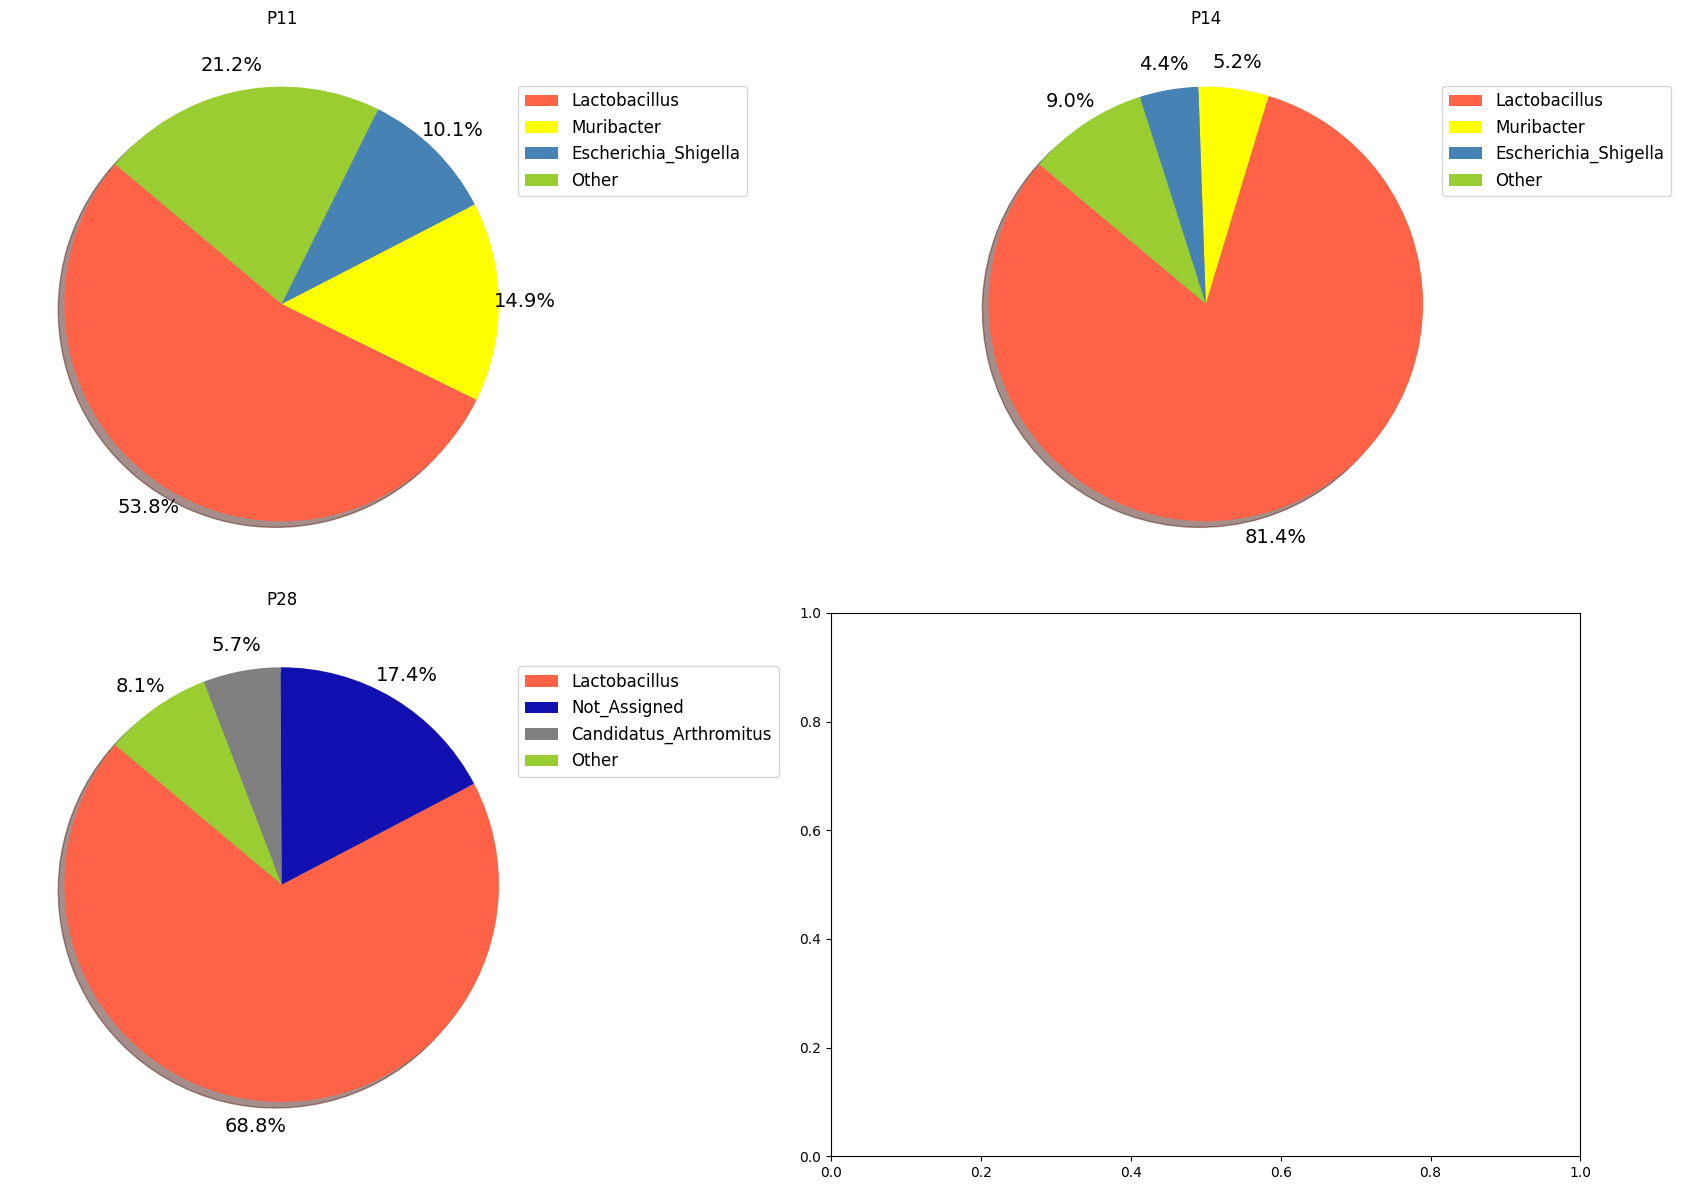

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'taxa_abund_ti_het_genus.csv'
data_df = pd.read_csv(file_path)

# Assigning 'DOL' groups directly as a new row in the DataFrame for clarity
dol_mapping = {
    "P11": ["051B", "058B", "060B", "066B", "067B", "080B", "082B", "084B", "087B", "096B", "102B", "104B", "214B", "216B", "230B", "231B", "232B", "236B", "240B", "251B"],
    "P14": ["143B", "144B", "147B", "150B", "152B", "153B", "154B", "159B", "160B", "164B", "169B", "255B", "257B", "262B", "263B"],
    "P28": ["108B", "110B", "116B", "117B", "118B", "123B", "125B", "127B", "128B", "131B", "132B", "136B", "139B"]
}

# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
data_df.set_index(data_df.columns[0], inplace=True)

# Sum up the counts by DOL for each bacteria type
# dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}
# data_df.set_index(data_df.columns[0], inplace=True)
# Define color mapping
color_mapping = {
    'Lactobacillus': '#FF6347',
    'Escherichia_Shigella': '#4682B4',
    'Not_Assigned': '#1111B1',
    'Bacteroides': '#EE82EE',
    'Streptococcus': '#F4A460',
    'Muribacter': '#FFFF00',
    'Lachnospiraceae_NK4A136_group': '#8A2BE2',
    "Candidatus_Arthromitus":"grey",
    'Other': '#9ACD32'
}
# # Define color mapping
# color_mapping = {
#     'Firmicutes': '#FF6347',
#     'Proteobacteria': '#4682B4',
#     'Bacteroidetes': '#EE82EE',
#     'Actinobacteria': '#F4A460',
#     'Euglenozoa': '#8A2BE2',
#     'Other': '#9ACD32'
# }
# Calculate and plot the pie charts with the top 3 features and 'Other'
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
for i, (dol, cols) in enumerate(dol_mapping.items()):
    ax = axes[i//2, i%2]
    sums = data_df[cols].sum(axis=1).sort_values(ascending=False)
    top_three = sums.head(3)
    other = pd.Series(sums[3:].sum(), index=['Other'])
    final_sums = pd.concat([top_three, other])
    
    # Assign colors according to the taxa, with a default color for 'Other'
    colors = [color_mapping.get(tax, color_mapping['Other']) for tax in final_sums.index]

    # wedges, texts, autotexts = ax.pie(final_sums, labels=final_sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    wedges, texts, autotexts = ax.pie(final_sums, labels=None, autopct='%1.1f%%', startangle=140, colors=colors,pctdistance=1.12, labeldistance=2.2,shadow=True,textprops={'fontsize': 14, 'color': 'black'})
    ax.set_title(f'{dol}')
    # Add a legend outside the plot
    ax.legend(wedges, final_sums.index, title="", loc="center left", bbox_to_anchor=(0.92, 0.3, 0.5, 1),fontsize='large')

plt.tight_layout()
plt.show()